## 面向对象（选修）

面向对象是一种试图以人类更容易理解的方式，来抽象化编程的过程

我更愿意把它看成是一种编程思想，而不是编程知识

很多时候不用面向对象的方法也可以实现你想要的功能，只不过用了面向对象会更好理解一点。

甚至于很多时候你可能都不会用到面向对象的编程方法。（所以你可以选择选修）

学习面向对象会有很多概念—— 类，对象，继承，多态……

正式定义是这样："把一组数据结构和处理它们的方法组成对象（object），把相同行为的对象归纳为类（class），通过类的封装（encapsulation）隐藏内部细节，通过继承（inheritance）实现类的特化（specialization）和泛化（generalization），通过多态（polymorphism）实现基于对象类型的动态分派。"

很多教程喜欢用动物，猫、狗的非常经典的例子。

但我觉得你也可以试试用下面这个视角，也许不太准确，但或许能有另一种理解：

类就是圆规，对象就是画出来的圆，继承和多态就是把圆规的针头换成吸头，笔换成了玻璃刀

<table>
<td>
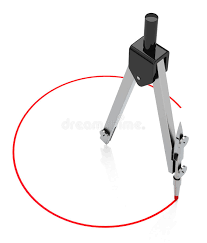
</td>
<td>
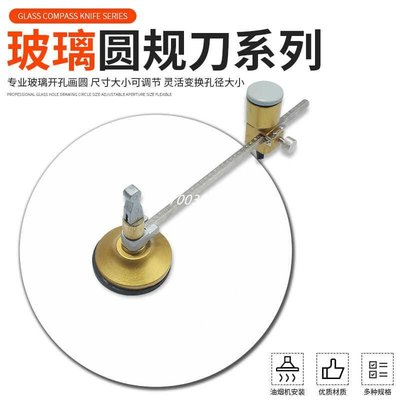
</td>
</table>


## 定义类
在Python中可以使用class关键字定义类，然后在类中通过之前学习过的函数来定义方法，这样就可以将对象的动态特征描述出来，代码如下所示

In [ ]:
class Compasses():
    def __init__(self, center, radius):
        self.center = center  #圆心
        self.radius = radius  #半径
        
    def circumference(self): #周长
        return 2*3.14*self.radius
    
    def area(self):          #面积
        return 3.14*self.radius**2

注意，在定义类的时候，有两个注意的点

- 第一个是`__init__() `方法，这是个固定用法，用来初始化一个对象的，当调用类名进行创建对象时，会根据传入的参数初始化整个对象。
- 第二个是`self`这个关键字，类似语文中的代词，代指生成的对象自己，在类内部的函数里，所有方法的第一个参数一定是他，在调用时，则不必传递

然后我们就可以快速的建立一个圆心在（0,0）点，半径为5的“圆圈”，并计算他的周长和面积：

这里圆心`center`的表示方法，我用了[元组](https://www.runoob.com/python3/python3-tuple.html)，表示圆心在X轴，Y轴的值。之前没有介绍是因为平常不一定用得，但做数据分析啥的还是会用到，推荐私下去了解看看。

In [ ]:
cirle = Compasses((0,0),5)

print("周长是：{}".format(cirle.circumference()))

print("面积是：{}".format(cirle.area()))

也可以在修改这个圆的圆心，或边长，比如：

In [ ]:
cirle = Compasses((0,0),5)

cirle.area = (1,1)
cirle.radius = 10

print("周长是：{}".format(cirle.circumference()))
print("面积是：{}".format(cirle.area()))

当然，如果一个圆画出来了，还要修改他的圆心和半径有点说不过去，那你可以将类内的属性（圆心，半径）的名称前加两个下划线“__”

In [ ]:
class Compasses2():
    def __init__(self, center, radius):
        self.__center = center  #圆心
        self.__radius = radius  #半径
        
    def circumference(self):
        print("this is circumference")
        return 2*3.14*self.__radius
    
    def area(self):
        print("this is area")
        return 3.14*self.__radius**2
    
    def change_center(self,center):
        self.__center = center
        
    def get_center(self):
        print("my center is {}".format(self.__center))

c2 = Compasses2((0,0),5)
print(c2.__center)
#AttributeError: 'Compasses2' object has no attribute '__center'

这样当你想直接访问对象里的相应属性时，会报错。

但试试如果赋值呢？

In [ ]:
c3 = Compasses2((0,0),10)
c.__center=(2,2)

居然没问题？！是哪里搞错了么？ 

其实不是，你可以用[`dir()`](https://www.runoob.com/python/python-func-dir.html)函数，查看对象的内部到底有些什么

In [ ]:
temp = Compasses2((0,0),5)


print(dir(temp))
print("")
print("======上面是未执行'temp.__center = (1,1)' 语句之前的情况，下面是执行后的情况=========")
print("")
temp.__center =(1,1)

print(dir(temp))

发现什么区别了么，原来在类里面定义的前面带"\_\_"的属性都被编译器变成了 "_<类名>\_\_<变量名>"，而我们后面赋值的`temp.__center =(1,1)`会在额外为对象添加一个新属性“\_\_center”.

试试下面这两行，也许你就明白了

In [ ]:
temp2 = Compasses2((0,0),5)
temp2.__center =(1,1)
print(temp2.__center )
temp2.get_center()

另外，你是否好奇，怎么在定义的类里，有那么多东西不是我们自己创建的？

他们也都很有用，具体可以查看[这里](https://www.liaoxuefeng.com/wiki/1016959663602400/1017590712115904)。

同时记住，不要在自己定义的属性名称后面加双下划线，不然很有可能会和这些内置的属性冲突.

还有一些python优于其他静态语言的用法，比如`__slots__`，也可查看[这里](https://www.liaoxuefeng.com/wiki/1016959663602400/1017501655757856)了解一下

## 继承和多态

把圆规改造成一个玻璃圆片切割刀，本质就是在圆规的基础上，把笔换成玻璃刀就行了，这就是继承

In [ ]:
class Compasses():
    def __init__(self, center, radius):
        self.center = center  #圆心
        self.radius = radius  #半径
        
    def circumference(self): #周长
        return 2*3.14*self.radius
    
    def area(self):          #面积
        return 3.14*self.radius**2
    

class Compasses_Glass_Cut(Compasses):
    def cut(self):
        print("切下了{}大的一块玻璃".format(self.area()))
    

```
class newClass(oldClass):
    ....
```

如上格式，我们就以newClass，继承了oldClass的所有属性。

继承后，你还可以接着为新类添加些方法，比如我们又为Compasses_Glass_Cut类加了一个`cut()`方法，让我们试试看。

In [ ]:
gc = Compasses_Glass_Cut((0,0),5)
gc.cut()

或者，你希望你的玻璃刀在划玻璃的时候，都比给的半径要大那么一点点，那你可以试试修改继承的函数，这就是多态

In [ ]:
class Compasses_Glass_Cut2(Compasses):
    
    def area(self):          #面积
        return 3.14*(self.radius+0.1)**2
    
    def cut(self):
        print("切下了{}大的一块玻璃".format(self.area()))
        
gc = Compasses_Glass_Cut2((0,0),5)
gc.cut()

好了，我觉得一个初学者学会这些足够应付95%以上的场景了，如果你还想了解更多，可以参考一些更[高级的用法](https://www.liaoxuefeng.com/wiki/1016959663602400/1017501628721248)

记住，使用面向对象，或者说抽象编程主要是为了两个目的，一是减少重复，二是让自己代码看起来更有逻辑。

在我自己的经验里，大部分可以减少重复的地方，我几乎都用函数实现了，唯一让我想起来用面向对象的，只是因为这样的代码让人看起来逻辑性更好。

### 练习

通过学习[元组](https://www.runoob.com/python3/python3-tuple.html)，你应该大致了解了这种数据类型的功能，接下来可以试着为Compasses类实现一个方法，来判断给定的一个点`point`是否在圆内呢？

In [ ]:
class Compasses():
    def __init__(self, center, radius):
        self.center = center  #圆心
        self.radius = radius  #半径
        
    def circumference(self): #周长
        return 2*3.14*self.radius
    
    def area(self):          #面积
        return 3.14*self.radius**2
    
    def contain_the_point(self,point):
        '''
        
        '''
        
        
cirle = Compasses((0,0),5)

if cirle.contain_the_point((3,3)):
    print("点在圆里")
else:
    print("点在圆外")